## 1. Autoencoder

In [46]:
import keras
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D, BatchNormalization, MaxPool2D, SimpleRNN, Embedding, Dense, LSTM, Conv1D, Dropout, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
input_img = keras.Input(shape=(32,32,3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)          

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5808 - val_loss: 0.5814
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5804 - val_loss: 0.5811
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5801 - val_loss: 0.5807
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5798 - val_loss: 0.5804
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5795 - val_loss: 0.5802
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5792 - val_loss: 0.5799
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5790 - val_loss: 0.5797
Epoch 8/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5788 - val_loss: 0.5803
Epoch 9/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5785 - val_loss: 0.5792
Epoch 10/50
391/391 [==============================] - 3s 8ms/step - loss: 0.5784 - val_loss: 0.5791

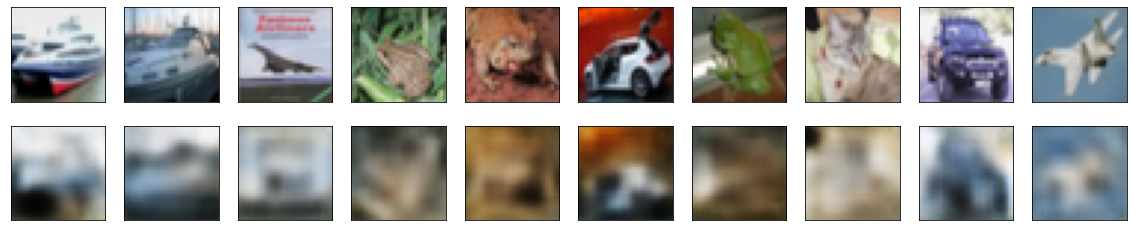

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification

### Deep CNN

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train1 = y_train.reshape(-1,)
y_test1 = y_test.reshape(-1,)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

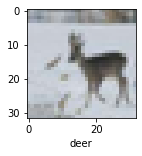

In [ ]:
plot_sample(x_train, y_train, 20)

In [ ]:
images.shape

(50000, 32, 32, 3)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_8 (Dense)              (None, 10)              

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

results = model.fit(x_train, y_train1, batch_size=32, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2946 - accuracy: 0.9391
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2665 - accuracy: 0.9426
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2721 - accuracy: 0.9421
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2853 - accuracy: 0.9422
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2622 - accuracy: 0.9425
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2776 - accuracy: 0.9412
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2577 - accuracy: 0.9446
Epoch 8/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2715 - accuracy: 0.9432
Epoch 9/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2861 - accuracy: 0.9417
Epoch 10/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.263

Text(0.5, 1.0, 'Loss on training set')

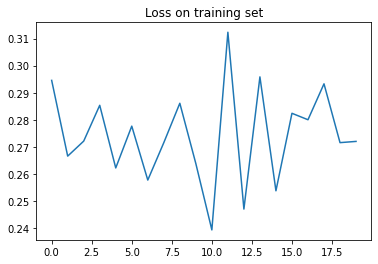

In [ ]:
plt.plot(results.history["loss"])
plt.title("Loss on training set")

Text(0.5, 1.0, 'Accuracy on training set')

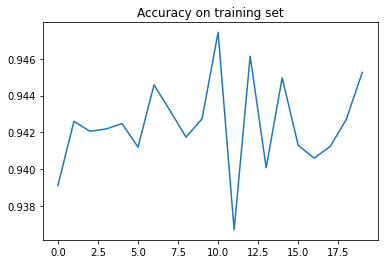

In [ ]:
plt.plot(results.history['accuracy'])
plt.title("Accuracy on training set")

In [ ]:
model.evaluate(x_test, y_test1)

313/313 [==============================] - 1s 2ms/step - loss: 8.8113 - accuracy: 0.6020


[8.811307907104492, 0.6019999980926514]

### 2.2 Transfer learning

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
y_train2 = keras.utils.to_categorical(y_train, 10)
y_test2 = keras.utils.to_categorical(y_test, 10)

In [ ]:
base_model = ResNet50(input_shape=(32,32,3), weights = 'imagenet', include_top=False)

model2 = Sequential()

model2.add(base_model)

model2.add(tf.keras.layers.GlobalAveragePooling2D())
model2.add(tf.keras.layers.Dense(64, activation='relu'))

model2.add(tf.keras.layers.Dropout(0.5))

model2.add(tf.keras.layers.Dense(10, activation='softmax'))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 23,719,498
Trainable params: 23,666,378
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


results2 = model2.fit(x_train, y_train2, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.7103 - accuracy: 0.4069
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3625 - accuracy: 0.5588
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2183 - accuracy: 0.6189
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.1089 - accuracy: 0.6507
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0682 - accuracy: 0.6635
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0432 - accuracy: 0.6777
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9885 - accuracy: 0.7025
Epoch 8/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9706 - accuracy: 0.6972
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9413 - accuracy: 0.7156
Epoch 10/10
1563/1563 [==============================] - 70s 45m

Text(0.5, 1.0, 'Loss on training set')

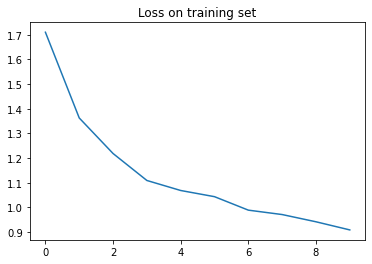

In [ ]:
plt.plot(results2.history["loss"])
plt.title("Loss on training set")

Text(0.5, 1.0, 'Accuracy on training set')

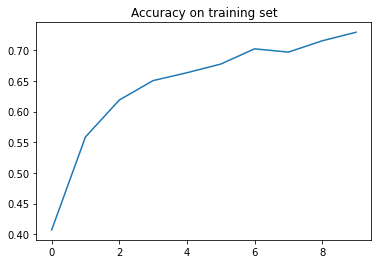

In [ ]:
plt.plot(results2.history['accuracy'])
plt.title("Accuracy on training set")

In [ ]:
model2.evaluate(x_test, y_test2)

313/313 [==============================] - 3s 10ms/step - loss: 1.1393 - accuracy: 0.6770


[1.1392557621002197, 0.6769999861717224]

## 3. Text Classfication

### RNN

In [1]:
import pandas as pd

In [2]:
spam_df = pd.read_csv('SPAM_detection.csv')

In [3]:
spam_df

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [4]:
spam_dic = ['HAM', 'SPAM']

In [8]:
texts = []
labels = []

for i, label in enumerate(spam_df['category_val']):
  texts.append(spam_df['Message'][i])
  labels.append(label)

texts = np.asarray(texts)
labels = np.asarray(labels)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [20]:
X_train

array(['Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
       'Hello. Sort of out in town already. That . So dont rush home, I am eating nachos. Will let you know eta.',
       'How come guoyang go n tell her? Then u told her?', ...,
       "Prabha..i'm soryda..realy..frm heart i'm sory",
       'Nt joking seriously i told',
       'Did he just say somebody is named tampa'], dtype='<U910')

In [16]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')

In [27]:
padded[0]

array([  87,    2,  172,  485,  461,  121,   33,    5, 3851, 3852,  315,
       1268,   30, 2603,   67,   82,    2, 1657,    2,  316,  238,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [31]:
model31 = Sequential()
model31.add(Embedding(10000, 32))
model31.add(SimpleRNN(32))
model31.add(Dense(1, activation='sigmoid'))

model31.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [53]:
model31.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
results_31 = model31.fit(padded, y_train, epochs=10, batch_size=32,validation_data=(testing_padded, y_test))

Epoch 1/10
140/140 [==============================] - 10s 71ms/step - loss: 0.3951 - acc: 0.8658 - val_loss: 0.3935 - val_acc: 0.8664
Epoch 2/10
140/140 [==============================] - 10s 70ms/step - loss: 0.3947 - acc: 0.8658 - val_loss: 0.3942 - val_acc: 0.8664
Epoch 3/10
140/140 [==============================] - 10s 71ms/step - loss: 0.3962 - acc: 0.8658 - val_loss: 0.3931 - val_acc: 0.8664
Epoch 4/10
140/140 [==============================] - 10s 72ms/step - loss: 0.3953 - acc: 0.8658 - val_loss: 0.3901 - val_acc: 0.8664
Epoch 5/10
140/140 [==============================] - 10s 71ms/step - loss: 0.3868 - acc: 0.8658 - val_loss: 0.3855 - val_acc: 0.8664
Epoch 6/10
140/140 [==============================] - 10s 74ms/step - loss: 0.3420 - acc: 0.8661 - val_loss: 0.3558 - val_acc: 0.8664
Epoch 7/10
140/140 [==============================] - 10s 74ms/step - loss: 0.2127 - acc: 0.9212 - val_loss: 0.3197 - val_acc: 0.8933
Epoch 8/10
140/140 [==============================] - 10s 70ms

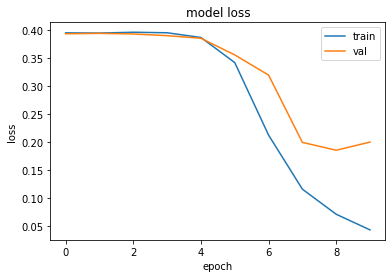

In [54]:
plt.plot(results_31.history['loss'])
plt.plot(results_31.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.show()

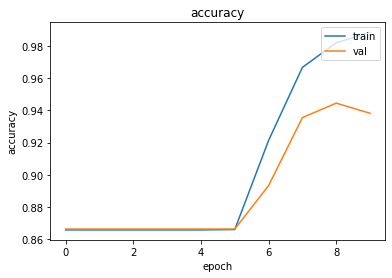

In [55]:
plt.plot(results_31.history['acc'])
plt.plot(results_31.history['val_acc'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('accuracy')
plt.show()

### CNN

In [48]:
model = Sequential()
model.add(Embedding(input_dim=10000 + 1, output_dim=10, input_length=100))
model.add(Conv1D(16, 5, activation='relu'))
model.add(Dropout(0.5))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))            
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
results_32 = model.fit(padded, y_train, batch_size=32, epochs=10, validation_data=(testing_padded, y_test))

Epoch 1/10
140/140 [==============================] - 1s 6ms/step - loss: 0.4658 - accuracy: 0.8645 - val_loss: 0.4562 - val_accuracy: 0.8664
Epoch 2/10
140/140 [==============================] - 1s 5ms/step - loss: 0.3670 - accuracy: 0.8658 - val_loss: 0.3543 - val_accuracy: 0.8664
Epoch 3/10
140/140 [==============================] - 1s 5ms/step - loss: 0.2140 - accuracy: 0.9147 - val_loss: 0.1571 - val_accuracy: 0.9857
Epoch 4/10
140/140 [==============================] - 1s 5ms/step - loss: 0.1005 - accuracy: 0.9715 - val_loss: 0.0933 - val_accuracy: 0.9883
Epoch 5/10
140/140 [==============================] - 1s 5ms/step - loss: 0.0622 - accuracy: 0.9823 - val_loss: 0.0704 - val_accuracy: 0.9874
Epoch 6/10
140/140 [==============================] - 1s 5ms/step - loss: 0.0410 - accuracy: 0.9888 - val_loss: 0.0564 - val_accuracy: 0.9874
Epoch 7/10
140/140 [==============================] - 1s 5ms/step - loss: 0.0380 - accuracy: 0.9892 - val_loss: 0.0531 - val_accuracy: 0.9874
Epoch 

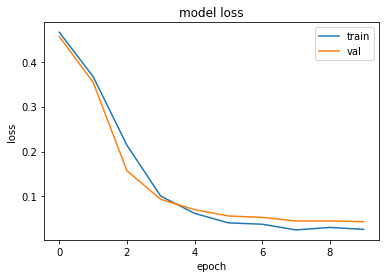

In [50]:
plt.plot(results_32.history['loss'])
plt.plot(results_32.history['val_loss'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('model loss')
plt.show()

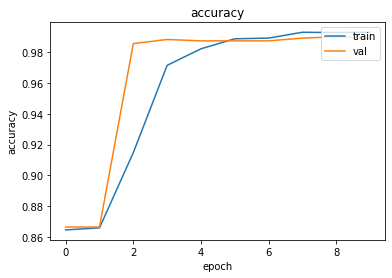

In [52]:
plt.plot(results_32.history['accuracy'])
plt.plot(results_32.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('accuracy')
plt.show()

### 3.3

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [62]:
y_pred_rnn = model31.predict(testing_padded).ravel()
fpr_rnn, tpr_rnn, thresholds_rnn = roc_curve(y_test, y_pred_rnn)
auc_rnn = auc(fpr_rnn, tpr_rnn)

In [63]:
y_pred_cnn = model.predict(testing_padded).ravel()
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
auc_cnn = auc(fpr_cnn, tpr_cnn)

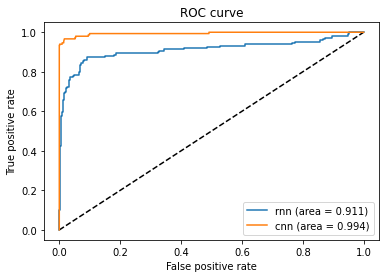

In [64]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rnn, tpr_rnn, label='rnn (area = {:.3f})'.format(auc_rnn))
plt.plot(fpr_cnn, tpr_cnn, label='cnn (area = {:.3f})'.format(auc_cnn))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

From the ROC curve, because cnn has larger area than rnn, looks like the cnn model that I built works better than the rnn model I built.